In [1]:
%matplotlib inline

In [2]:
import os
from collections import defaultdict
from matplotlib import pyplot as plt
import numpy as np

In [3]:
WERS = {
    "7UwjnYg8JNw.ctm": 0.4784370477568741, 
    "UHRjU17wYc0.ctm": 0.5354150799695354,
    "vxl9XGVqcR0.ctm": 0.5096056622851365,
    "MpVyp_YxFJw.ctm": 0.4539544962080173,
    "wvDescn7acA.ctm": 0.8140540540540541
}

In [4]:
def read_ctm(ctm_file):
    probs = defaultdict(list)
    for line in open(os.path.join("data", ctm_file)):
        video, channel, start_time, duration, hypothesis, probability = line.split(" ")
        probs[video].append(1.0 - float(probability.strip()))
    return probs

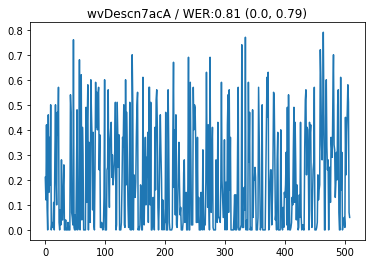

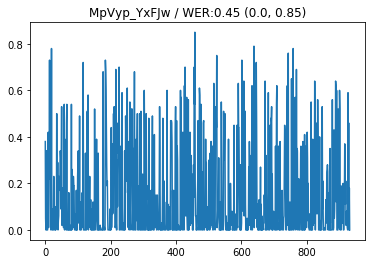

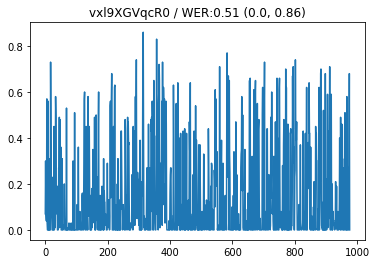

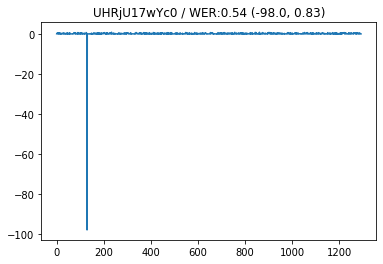

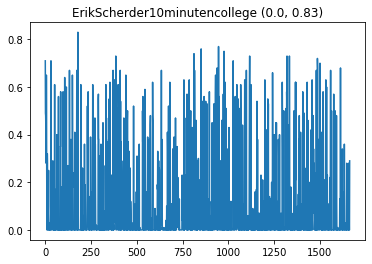

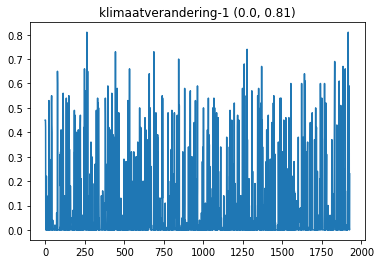

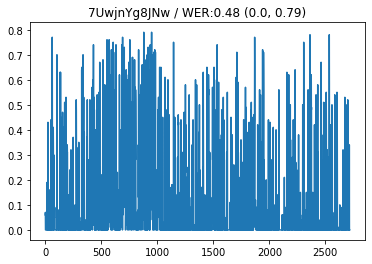

In [5]:
for entry in os.scandir("data"):
    ctm = read_ctm(entry.name)
    for video, probs in ctm.items():
        title = video if entry.name not in WERS else video + f" / WER:{WERS[entry.name]:.2f}"
        title += f" ({min(probs)}, {max(probs)})"
        plt.plot(range(0, len(probs)), probs)
        plt.title(title)
        plt.show()